In [12]:
import pandas as pd
import numpy as np

In [13]:
dataset = pd.read_csv('data/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()

In [21]:
dataset['sex'] = encoder.fit_transform(dataset['sex'])
dataset['smoker'] = encoder.fit_transform(dataset['smoker'])
dataset['region'] = encoder.fit_transform(dataset['region'])

In [22]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

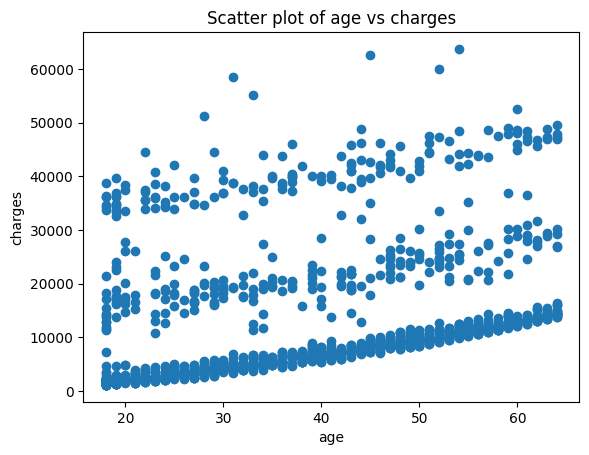

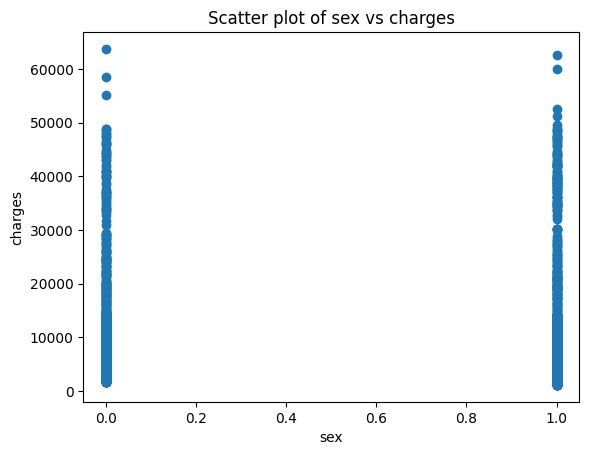

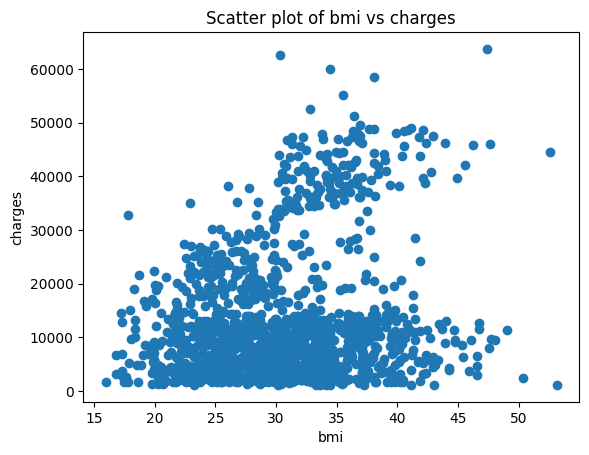

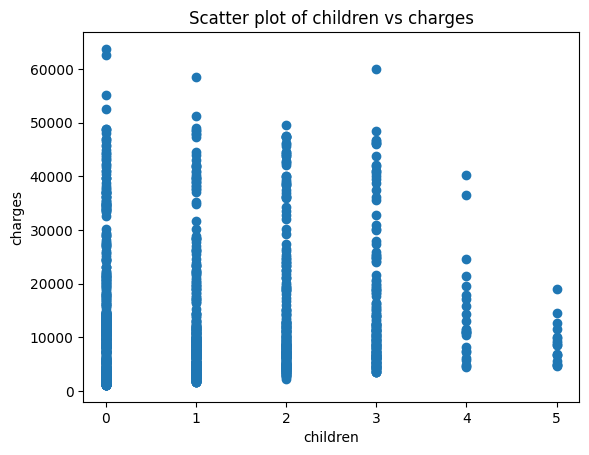

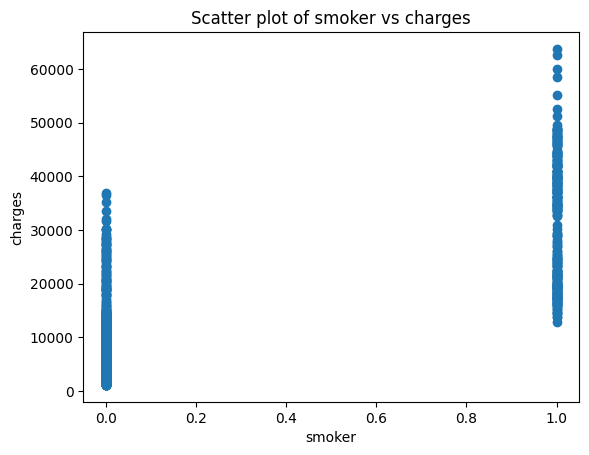

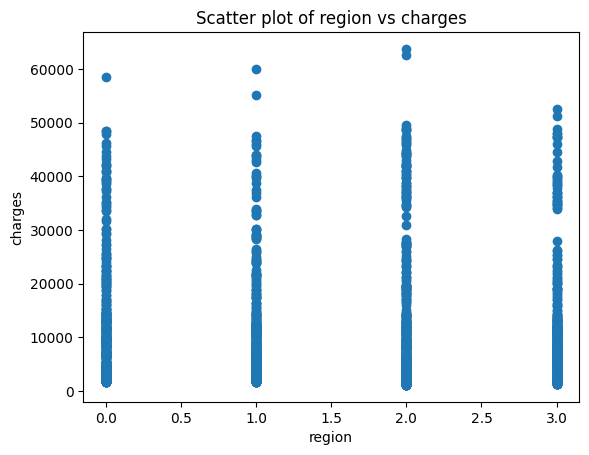

In [24]:
output_variable = 'charges'  # Replace with the actual name of your output variable

for column in dataset.columns:
    if column != output_variable:
        plt.scatter(dataset[column], dataset[output_variable])
        plt.xlabel(column)
        plt.ylabel(output_variable)
        plt.title(f'Scatter plot of {column} vs {output_variable}')
        plt.show()

<Figure size 600x600 with 0 Axes>

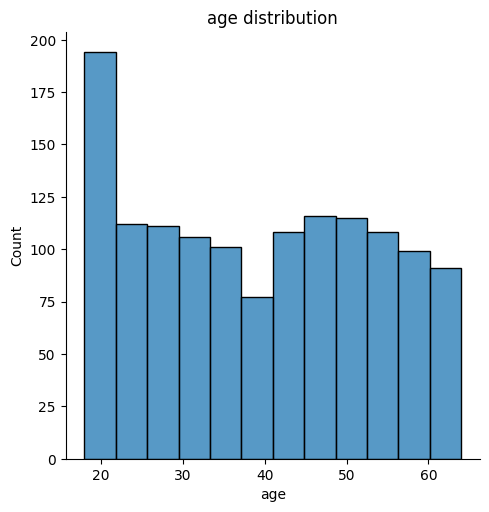

<Figure size 600x600 with 0 Axes>

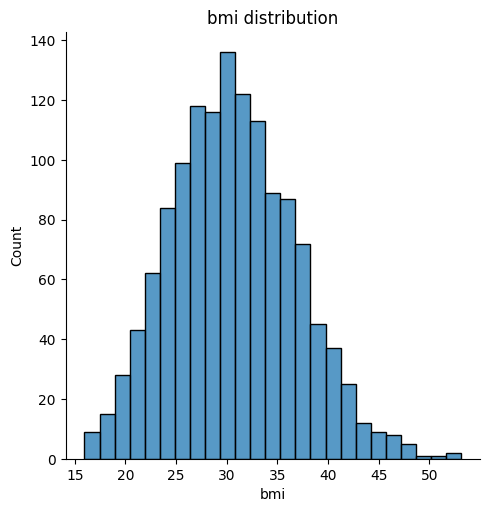

<Figure size 600x600 with 0 Axes>

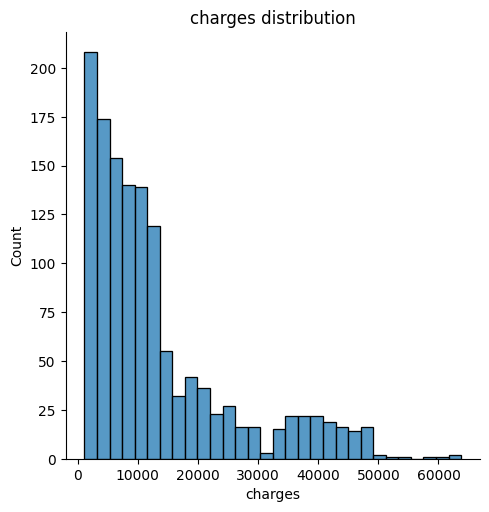

In [25]:
for column in ['age', 'bmi', 'charges']:
    plt.figure(figsize = (6, 6))
    sns.displot(dataset[column])
    plt.title(f'{column} distribution')
    plt.show()

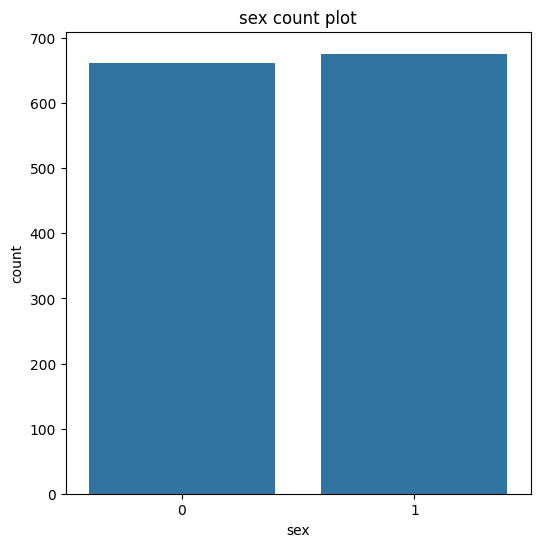

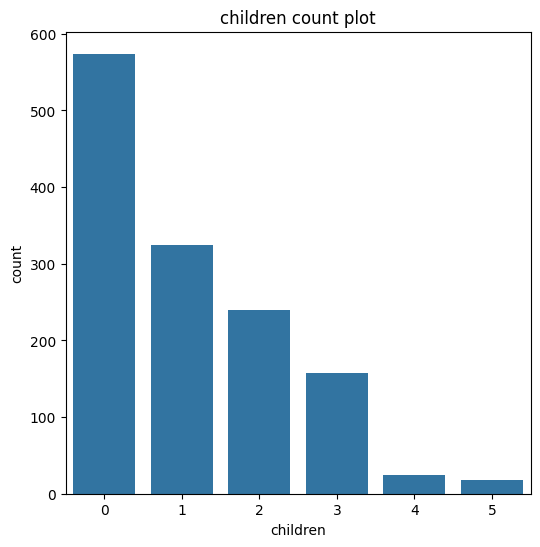

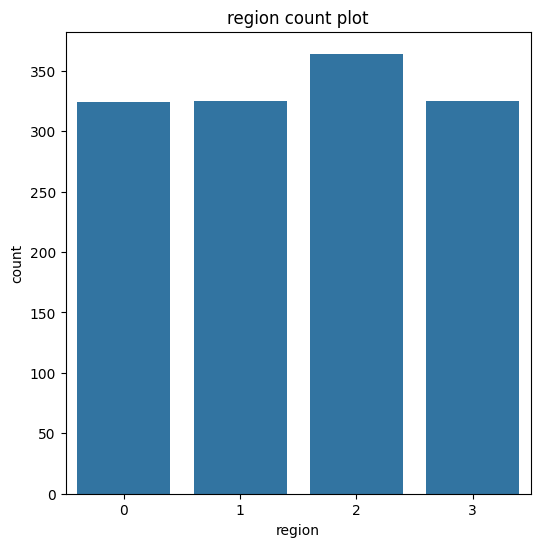

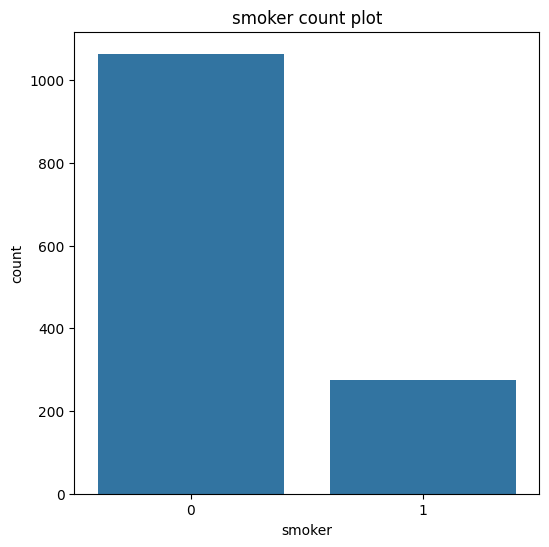

In [26]:
for column in ['sex', 'children', 'region', 'smoker']:
    plt.figure(figsize = (6,6))
    sns.countplot(x = column, data = dataset)
    plt.title(f'{column} count plot')
    plt.show()

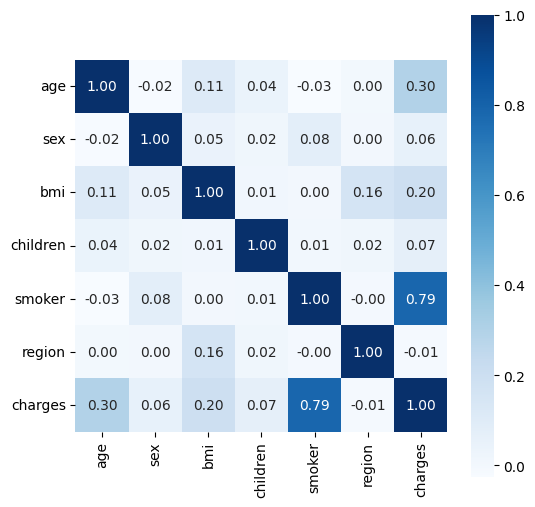

In [27]:
corr = dataset.corr()

plt.figure(figsize = (6,6))
sns.heatmap(corr, cbar = True, cmap = 'Blues', square = True, annot = True, fmt ='.2f')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = dataset.drop('charges', axis = 1)
y = dataset['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

In [32]:
from sklearn.linear_model import SGDRegressor, LinearRegression

In [33]:
sgdr = SGDRegressor(max_iter = 1000)
sgdr.fit(X_norm, y_train)

SGDRegressor()

In [34]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, sgdr.predict(scaler.fit_transform(X_test)))
r2_lr = r2_score(y_test, lr.predict(X_test))
print(f' SGDRegressor : {r2} || Linear Regression : {r2_lr}')

 SGDRegressor : 0.7834378582978266 || Linear Regression : 0.7833463107364539
